In [390]:
import pandas as pd
import matplotlib.pyplot as plt           
import numpy as np
from scipy.stats import sem

In [391]:
csvpath1 = "../../../../../Desktop/GTATL201908DATA3/02 - Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"
csvpath2 = "../../../../../Desktop/GTATL201908DATA3/02 - Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv"

In [392]:
clinic_df = pd.read_csv(csvpath1)
drug_df = pd.read_csv(csvpath2)

In [393]:
#clinic_df.head()

In [394]:
#drug_df.head()

In [395]:
combined_df = pd.merge(drug_df,clinic_df,on='Mouse ID')
#combined_df.head()

In [396]:
drug_list = combined_df['Drug'].unique()
#drug_list

In [397]:
tumor_size_df = combined_df.groupby(['Drug','Timepoint'])
avg_tumor_size_l = tumor_size_df['Tumor Volume (mm3)'].mean()
avg_tumor_size_df = pd.DataFrame(avg_tumor_size_l)
#print(avg_tumor_size_df.head())

sem_tumor_size_l = tumor_size_df['Tumor Volume (mm3)'].sem()
#print(sem_tumor_size_l)
sem_tumor_size_df = pd.DataFrame(sem_tumor_size_l)

In [398]:
new_avg_tumor_size_df=avg_tumor_size_df.reset_index('Timepoint')
#print(new_avg_tumor_size_df.head())
try_me = new_avg_tumor_size_df.reset_index('Drug')
#print(try_me)
drug_mean_all = try_me.pivot(index = 'Timepoint',columns = 'Drug',values = 'Tumor Volume (mm3)')
drug_mean = drug_mean_all.drop(columns=['Stelasyn','Propriva','Naftisol','Ceftamin','Zoniferol','Ramicane'])
#print(drug_mean_all)

sem_try_me = new_avg_tumor_size_df['Tumor Volume (mm3)'].sem()
#print(sem_try_me)

new_sem_tumor_size_df = sem_tumor_size_df.reset_index('Timepoint')
new_sem_tumor_size2_df = new_sem_tumor_size_df.reset_index('Drug')
#print(new_sem_tumor_size2_df)

new_sem_tumor_size3_df = new_sem_tumor_size2_df.set_index('Drug')
#print(new_sem_tumor_size2_df)
#capomulin2_sem_df = new_sem_tumor_size2_df.loc['Capomulin',:]


drug_sem = new_sem_tumor_size2_df.pivot(index = 'Timepoint',columns = 'Drug',values = 'Tumor Volume (mm3)')
drug_sem = drug_sem.drop(columns=['Stelasyn','Propriva','Naftisol','Ceftamin','Zoniferol','Ramicane'])
#print(drug_sem)


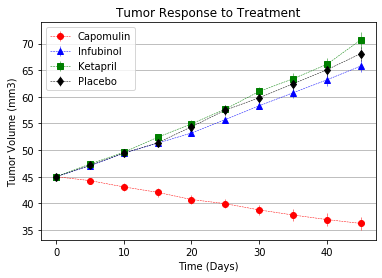

In [449]:
x_axis = np.arange(0,50,5)
fig, ax = plt.subplots()
cap_plot=ax.errorbar(x_axis,drug_mean['Capomulin'],drug_sem['Capomulin'],color='red',label='Capomulin',marker='o',fmt='--',elinewidth=.5,linewidth=.5)
inf_plot=ax.errorbar(x_axis,drug_mean['Infubinol'],drug_sem['Infubinol'],color='blue',label='Infubinol',marker='^',fmt='--',elinewidth=.5,linewidth=.5)
ket_plot=ax.errorbar(x_axis,drug_mean['Ketapril'],drug_sem['Ketapril'],color='green',label='Ketapril',marker='s',fmt='--',elinewidth=.5,linewidth=.5)
pla_plot=ax.errorbar(x_axis,drug_mean['Placebo'],drug_sem['Placebo'],color='black',label='Placebo',marker='d',fmt='--',elinewidth=.5,linewidth=.5)
ax.yaxis.grid(True)
ax.legend()
ax.set_xticks([0,10,20,30,40])
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.savefig("Images/tumor_response.png")
plt.show()

In [400]:
# try_me2.plot(style='o')
# #standard_errors = [sem(s) for s in avg_tumor_size_df['Tumor Volume (mm3)']]
# # plt.errorbar(try_me['Timepoint'],try_me['Tumor Volume (mm3)'],yerr=standard_errors,fmt='o')
# plt.legend(bbox_to_anchor=(1.1, 1.05))

# plt.errorbar(try_me['Timepoint'],try_me['Tumor Volume (mm3)'],sem_tumor_size_df['Tumor Volume (mm3)'],fmt='|')

# plt.show()

# #fig, ax = plt.subplots()
# #plt.errorbar(try_me['Timepoint'],avg_tumor_size_l,standard_errors, fmt='o')

In [401]:
met_sites_mean = tumor_size_df['Metastatic Sites'].mean()
met_sites_mean_df = pd.DataFrame(met_sites_mean)

In [402]:
met_sites_sem = tumor_size_df['Metastatic Sites'].sem()
met_sites_sem_df = pd.DataFrame(met_sites_sem)

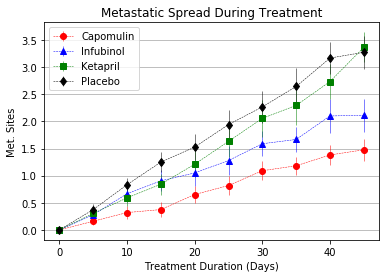

In [450]:
fig2, ax2 = plt.subplots()
cap_plot2=ax2.errorbar(x_axis,met_sites_mean['Capomulin'],met_sites_sem['Capomulin'],color='red',label='Capomulin',marker='o',fmt='--',elinewidth=.5,linewidth=.5)
inf_plot2=ax2.errorbar(x_axis,met_sites_mean['Infubinol'],met_sites_sem['Infubinol'],color='blue',label='Infubinol',marker='^',fmt='--',elinewidth=.5,linewidth=.5)
ket_plot2=ax2.errorbar(x_axis,met_sites_mean['Ketapril'],met_sites_sem['Ketapril'],color='green',label='Ketapril',marker='s',fmt='--',elinewidth=.5,linewidth=.5)
pla_plot2=ax2.errorbar(x_axis,met_sites_mean['Placebo'],met_sites_sem['Placebo'],color='black',label='Placebo',marker='d',fmt='--',elinewidth=.5,linewidth=.5)
ax2.yaxis.grid(True)
ax2.legend()
ax2.set_xticks([0,10,20,30,40])
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")
ax2.set_title("Metastatic Spread During Treatment")
plt.savefig("Images/metastatic_spread.png")
plt.show()

In [426]:
mouse_count = tumor_size_df['Mouse ID'].count()
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()

mouse_count_df = mouse_count_df.pivot(index = 'Timepoint',columns = 'Drug',values = 'Mouse ID')

#mouse_count_df2 = mouse_count_df.drop(columns =['Stelasyn','Propriva','Naftisol','Ceftamin','Zoniferol','Ramicane'])

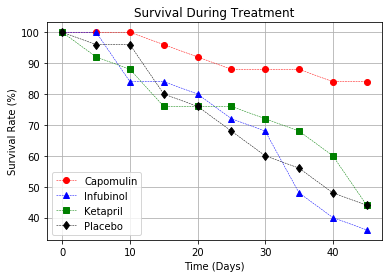

In [451]:
fig3, ax3 = plt.subplots()
cap_plot3=ax3.plot(x_axis,(mouse_count_df['Capomulin']/25)*100,color='red',label='Capomulin',marker='o',linewidth=.5,linestyle='dashed')
inf_plot3=ax3.plot(x_axis,(mouse_count_df['Infubinol']/25)*100,color='blue',label='Infubinol',marker='^',linewidth=.5,linestyle='dashed')
ket_plot3=ax3.plot(x_axis,(mouse_count_df['Ketapril']/25)*100,color='green',label='Ketapril',marker='s',linewidth=.5,linestyle='dashed')
pla_plot3=ax3.plot(x_axis,(mouse_count_df['Placebo']/25)*100,color='black',label='Placebo',marker='d',linewidth=.5,linestyle='dashed')
ax3.grid()
ax3.legend()
ax3.set_xticks([0,10,20,30,40])
ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_title("Survival During Treatment")
plt.savefig("Images/mouse_survival.png")
plt.show()

In [406]:
cap_per_in = drug_mean.iloc[0,0]
cap_per_end = drug_mean.iloc[9,0]
cap_per_chg = ((cap_per_end - cap_per_in)/cap_per_in)*100

inf_per_in = drug_mean.iloc[0,1]
inf_per_end = drug_mean.iloc[9,1]
inf_per_chg = ((inf_per_end - inf_per_in)/inf_per_in)*100

ket_per_in = drug_mean.iloc[0,2]
ket_per_end = drug_mean.iloc[9,2]
ket_per_chg = ((ket_per_end - ket_per_in)/ket_per_in)*100

pla_per_in = drug_mean.iloc[0,3]
pla_per_end = drug_mean.iloc[9,3]
pla_per_chg = ((pla_per_end - pla_per_in)/pla_per_in)*100

cef_per_in = drug_mean_all.iloc[0,1]
cef_per_end = drug_mean_all.iloc[9,1]
cef_per_chg = ((cef_per_end - cef_per_in)/cef_per_in)*100

naf_per_in = drug_mean_all.iloc[0,4]
naf_per_end = drug_mean_all.iloc[9,4]
naf_per_chg = ((naf_per_end - naf_per_in)/naf_per_in)*100

pro_per_in = drug_mean_all.iloc[0,6]
pro_per_end = drug_mean_all.iloc[9,6]
pro_per_chg = ((pro_per_end - pro_per_in)/pro_per_in)*100

ram_per_in = drug_mean_all.iloc[0,7]
ram_per_end = drug_mean_all.iloc[9,7]
ram_per_chg = ((ram_per_end - ram_per_in)/ram_per_in)*100

ste_per_in = drug_mean_all.iloc[0,8]
ste_per_end = drug_mean_all.iloc[9,8]
ste_per_chg = ((ste_per_end - ste_per_in)/ste_per_in)*100

zon_per_in = drug_mean_all.iloc[0,9]
zon_per_end = drug_mean_all.iloc[9,9]
zon_per_chg = ((zon_per_end - zon_per_in)/zon_per_in)*100

all_perc_ch_l = [cap_per_chg,inf_per_chg,ket_per_chg,pla_per_chg]

In [407]:
drug_per_chg_df = pd.DataFrame({'Capomulin':[cap_per_chg],'Infubinol':[inf_per_chg],
                               'Ketapril':[ket_per_chg],'Palcebo':[pla_per_chg]})
drug_per_chg_df = drug_per_chg_df.T
drug_per_chg_df2 = drug_per_chg_df.rename(columns={"0":"Percent Change"})
#drug_per_chg_df2

In [427]:
color = []
for drug in drug_per_chg_df2[0]:
        if drug < 0:
            color.append("green")
        if drug > 0:
            color.append("red")
#color

In [409]:
# drug_name_df = pd.DataFrame(drug_list)
# drug_name_df = drug_name_df[0].sort_values()
drug_name_l = ['Capomulin','Infubinol','Ketapril','Placebo']
#drug_name_l

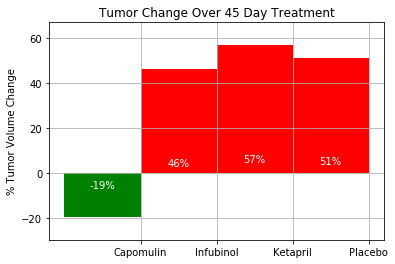

In [452]:
fig4, ax4 = plt.subplots()
drug_x_axis = np.arange(1,5)
for i in range(len(drug_per_chg_df2)):
    rects1 = ax4.bar(drug_x_axis,drug_per_chg_df2[0],color = color,align='edge',width=-1)

tick_locations = [value for value in drug_x_axis]
plt.xticks(tick_locations,drug_name_l)  

ax4.set_ylabel("% Tumor Volume Change")
ax4.set_title("Tumor Change Over 45 Day Treatment")
ax4.set_ylim(drug_per_chg_df2[0].min()-10, drug_per_chg_df2[0].max()+10)
ax4.grid()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax4.text(rect.get_x() + rect.get_width()/2.,.15*height,
                '%d%%' % int(height),
                ha='center', va='top',color='white')
autolabel(rects1)
plt.savefig("Images/tumor_per_change.png")
plt.show()